In [1]:
using PyPlot

In [2]:
push!(LOAD_PATH, pwd())
using Ising

En este notebook, investigaremos cuestiones de física que muestran el modelo de Ising.

## Escalamiento

Usa una versión eficiente del código del modelo de Ising para las siguientes tareas.

In [3]:
@time energiapromedio_temp(10.0,1000,1000,100_000)

 11.868247 seconds (107.51 k allocations: 852.361 MB, 0.81% gc time)


101-element Array{Float64,1}:
 -35559.3 
 -34952.4 
 -38071.4 
 -34854.8 
 -33650.0 
 -36614.2 
 -32743.9 
 -31854.0 
 -32706.7 
 -31863.8 
 -32456.6 
 -32625.9 
 -28892.9 
      ⋮   
  -7878.05
  -9597.96
 -10084.2 
 -10007.9 
  -7924.45
  -7596.98
  -7726.51
 -10361.0 
  -6738.27
  -6129.04
  -4121.63
  -7133.62

[1] Define la *energía por espín* $e := E/N$ y *magnetización por espín* $m := M/N$.

(i) Grafica $\langle e \rangle_T$ en función de la temperatura $T$, para distintos tamaños del sistema. 

In [64]:
intervalos=[2^i for i in [3:10]]
tamanos=length(intervalos)
e_T=zeros(101,tamanos)
@time for i in 1:tamanos
    e_T[:,i]=energiapromedio_temp(10.0,intervalos[i],intervalos[i],100_000)/(intervalos[i]^2)
end

elapsed time: 89.757799285 seconds (1776173656 bytes allocated, 3.33% gc time)


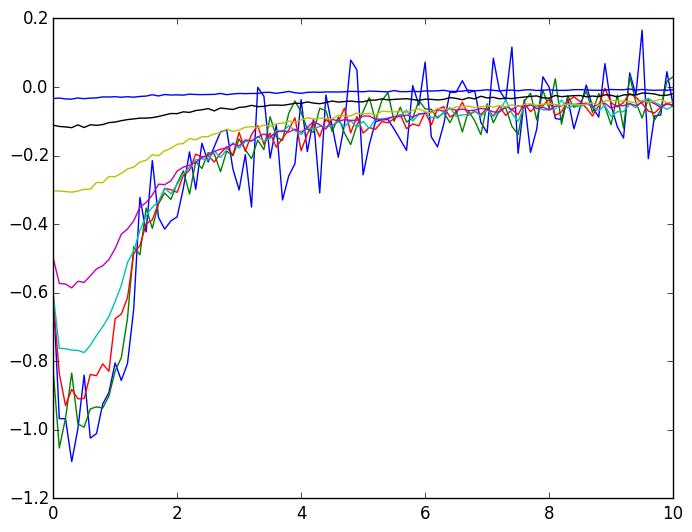

8-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1266af2250>
 PyObject <matplotlib.lines.Line2D object at 0x7f1266af24d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f1266af2710>
 PyObject <matplotlib.lines.Line2D object at 0x7f1266af28d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f1266af2a90>
 PyObject <matplotlib.lines.Line2D object at 0x7f1266af2c50>
 PyObject <matplotlib.lines.Line2D object at 0x7f1266af2e10>
 PyObject <matplotlib.lines.Line2D object at 0x7f1266ba7a50>

In [65]:
plot([0:0.1:10],e_T)

In [33]:
length(e_T[1,:])

11

In [44]:
minimum(e_T[:,1])

-0.8574624093759062

In [66]:
minimose=zeros(tamanos)
for i in 1:tamanos
    minimose[i]=minimum(e_T[:,i])
end

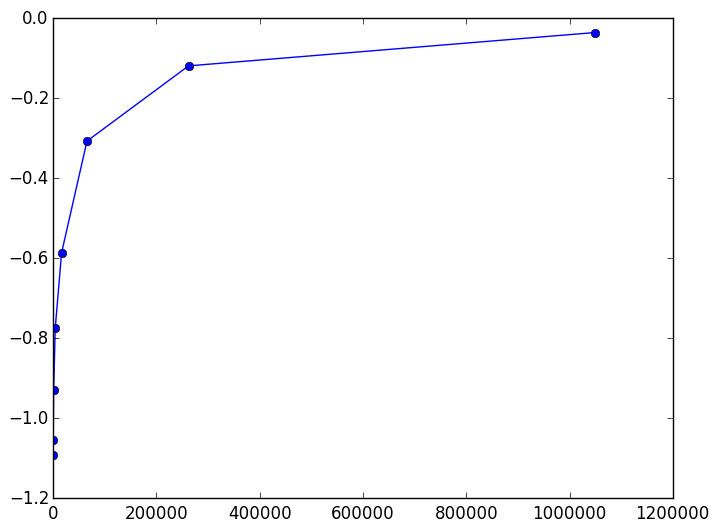

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f12671c4d10>

In [70]:
plot(intervalos.^2,minimose,"o-")

(ii) Grafica $\langle |m| \rangle_T$ en función de la temperatura $T$, para distintos tamaños del sistema.

¿Qué observas? ¿A qué corresponde físicamente? ¿Cuál es el efecto de aumentar el tamaño del sistema?

Nótese que es común trabajar con tiempos en unidades de *un sweep*, definido como $N$ intentos por voltear un espín. Esto corresponde a un "tiempo físico", ya que da a cada espín la oportunidad de voltearse una vez (en promedio).

In [33]:
intervalosm=[5,10,25,50]
tempmax=3.2
paso=0.2
temperaturas=collect(1.6:paso:tempmax)
tamanosm=length(intervalosm)
absm_T=zeros(length(temperaturas),tamanosm)
@time for i in 1:tamanosm
    absm_T[:,i]=magnetizacionpromedio_temp(temperaturas,intervalosm[i],intervalosm[i],15_000*(intervalosm[i]^2),paso)/(intervalosm[i]^2)
end

 80.169095 seconds (298 allocations: 6.538 GB, 1.24% gc time)


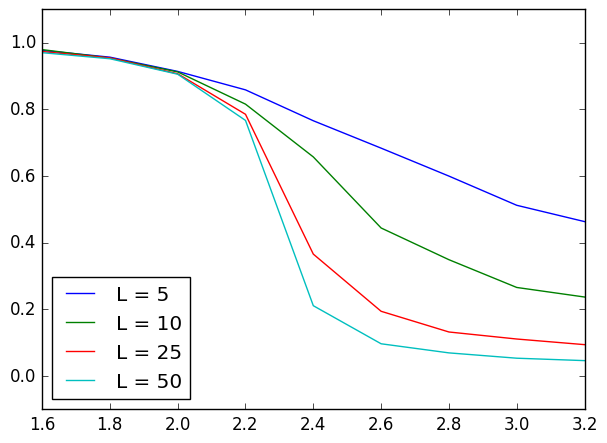

PyObject <matplotlib.legend.Legend object at 0x325966438>

In [35]:
fig = figure(figsize=(7,5))
for i in 1:tamanosm
    str = latexstring("L = 2^{$(i+2)}")
    plot(temperaturas,absm_T[:,i], label="L = $(intervalosm[i])")
end
xlim([1.6,3.2])
ylim([-0.1,1.1])
legend(loc=3)

[2] La *capacidad calorífica* se define como

$$ C_T := \frac{\partial \langle E \rangle(T)}{\partial T}. $$

(i) Encuentra una fórmula para $C$ en términos de la función de partición $Z$.

(ii) Encuentra una fórmula para $C$ en términos de promedios de ensamble.

[3] Calcula $c_T := C_T/N$ y dibújalo en función de $T$. ¿Qué observas?

## Ising con campo externo

La física cambia si le agregamos un *campo magnético externo* al modelo, es decir un campo magnético de magnitud $h$ que acopla a cada espín.

[4] Escribe un Hamiltoniano para la energía de una configuración $\pmb{\sigma}$.

[5] Haz una simulación del modelo para temperaturas $T$ más o menos bajas, cambiando el campo de positivo a negativo y de regreso. ¿Qué se observa?

[6] Dibuja configuraciones para entender físicamente lo que está pasando.